In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from dataset import QM9



RDKit WARNING: [10:36:19] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
ds_params = {'train_params': {'n': 1000,
                              'features': ['A','B','C','mu','alpha','homo','lumo', 
                                           'gap','r2','zpve','Cv','mulliken','coulomb'],
                              'embeds': [],
                              'targets': ['U0'],
                              'pad': None, 
                              #'filter_on': ('n_atoms','>','18'),
                              'use_pickle': False,
                              'flatten': True}}

qm9 = QM9(**ds_params['train_params'])

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
total uncharacterized molecules removed:  25
total QM9 molecules created:  975
CDataset created...


In [3]:
qm9.ds_idx[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
mol = qm9.ds[2]
print(mol)

./data/qm9/qm9.xyz/dsgdb9nsd_000002


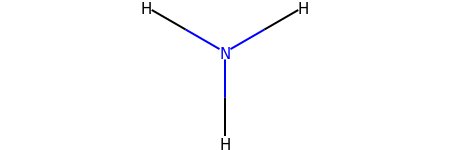

In [5]:
mol.rdmol

In [6]:
print(mol.rdmol.GetNumAtoms())

4


In [7]:
print(len(mol.atom_type))
print(mol.atom_type)

4
['N', 'H', 'H', 'H']


In [8]:
print(mol.mol_block)


     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  0
M  END



In [9]:
print(mol.properties)

['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'U0', 'U', 'H', 'G', 'Cv', 'smile', 'n_atoms', 'xyz', 'mulliken']


In [10]:
mol.smile

'N\tN\t\n'

In [11]:
mol.qm9_block

['4\n',
 'gdb 2\t293.60975\t293.54111\t191.39397\t1.6256\t9.46\t-0.257\t0.0829\t0.3399\t26.1563\t0.034358\t-56.525887\t-56.523026\t-56.522082\t-56.544961\t6.316\t\n',
 'N\t-0.0404260543\t 1.0241077531\t 0.0625637998\t-0.707143\n',
 'H\t 0.0172574639\t 0.0125452063\t-0.0273771593\t 0.235712\n',
 'H\t 0.9157893661\t 1.3587451948\t-0.0287577581\t 0.235712\n',
 'H\t-0.5202777357\t 1.3435321258\t-0.7755426124\t 0.23572\n',
 '1103.8733\t1684.1158\t1684.3072\t3458.7145\t3575.2414\t3575.3343\n',
 'N\tN\t\n',
 'InChI=1S/H3N/h1H3\tInChI=1S/H3N/h1H3\n']

In [12]:
mol.xyz

array([[-0.04042605,  1.0241077 ,  0.0625638 ],
       [ 0.01725746,  0.01254521, -0.02737716],
       [ 0.91578937,  1.3587452 , -0.02875776],
       [-0.52027774,  1.3435321 , -0.7755426 ]], dtype=float32)

In [13]:
print(mol.adjacency.shape)
mol.adjacency

(4, 4)


array([[0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [14]:
from scipy.sparse import coo_matrix

In [15]:
coo = coo_matrix(mol.adjacency)

In [16]:
print(coo)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1


In [17]:
from torch_geometric.datasets import QM9 as TQM9

In [18]:
tqm9 = TQM9(root='./data/qm9')

In [19]:
tqm9[1]

Data(x=[4, 11], edge_index=[2, 6], edge_attr=[6, 4], y=[1, 19], pos=[4, 3], z=[4], name='gdb_2', idx=[1])

In [20]:
tqm9[1].x

tensor([[0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 3.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [21]:
tqm9[1].edge_index

tensor([[0, 0, 0, 1, 2, 3],
        [1, 2, 3, 0, 0, 0]])

In [22]:
tqm9[1].edge_attr

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

In [23]:
tqm9[1].y

tensor([[ 1.6256e+00,  9.4600e+00, -6.9933e+00,  2.2558e+00,  9.2491e+00,
          2.6156e+01,  9.3493e-01, -1.5381e+03, -1.5381e+03, -1.5380e+03,
         -1.5387e+03,  6.3160e+00, -1.2006e+01, -1.2082e+01, -1.2159e+01,
         -1.1246e+01,  2.9361e+02,  2.9354e+02,  1.9139e+02]])

In [24]:
tqm9[1].pos

tensor([[-0.0404,  1.0241,  0.0626],
        [ 0.0173,  0.0125, -0.0274],
        [ 0.9158,  1.3587, -0.0288],
        [-0.5203,  1.3435, -0.7755]])

In [25]:
tqm9[1].z

tensor([7, 1, 1, 1])

In [26]:
tqm9[1].idx

tensor([1])

In [27]:
print(mol.distance.shape)
mol.distance

(4, 4)


array([[0.       , 1.01719  , 1.0171872, 1.0172079],
       [1.01719  , 0.       , 1.6185228, 1.6187099],
       [1.0171872, 1.6185228, 0.       , 1.6187056],
       [1.0172079, 1.6187099, 1.6187056, 0.       ]], dtype=float32)

In [28]:
print(mol.coulomb.shape)
mol.coulomb

(4, 4)


array([[53.35872   , 18.940014  , 18.939964  , 18.940912  ],
       [ 0.98309565,  0.5       ,  2.7057092 ,  2.7058449 ],
       [ 0.98309565,  2.7057161 ,  0.5       ,  2.7058449 ],
       [ 0.98309565,  2.7057161 ,  2.7057092 ,  0.5       ]],
      dtype=float32)

In [29]:
print(qm9[2][0].shape)
qm9[2]

(31,)


(array([ 2.9360974e+02,  2.9354111e+02,  1.9139397e+02,  1.6256000e+00,
         9.4600000e+00, -2.5700000e-01,  8.2900003e-02,  3.3989999e-01,
         2.6156300e+01,  3.4357999e-02,  6.3160000e+00, -7.0714301e-01,
         2.3571201e-01,  2.3571201e-01,  2.3571999e-01,  5.3358719e+01,
         1.8940014e+01,  1.8939964e+01,  1.8940912e+01,  9.8309565e-01,
         5.0000000e-01,  2.7057092e+00,  2.7058449e+00,  9.8309565e-01,
         2.7057161e+00,  5.0000000e-01,  2.7058449e+00,  9.8309565e-01,
         2.7057161e+00,  2.7057092e+00,  5.0000000e-01], dtype=float32),
 [],
 array([-56.525887], dtype=float32))